In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt


data = pd.read_csv("healthcare-dataset-stroke-data.csv")

balanced_data = data.dropna()
balanced_data = balanced_data.drop(columns= "id")
balanced_data = balanced_data[balanced_data.age > 20]
balanced_data = balanced_data.drop(balanced_data.index[balanced_data["gender"] == "Other"])
balanced_data = balanced_data.drop(balanced_data.index[balanced_data["work_type"] == "Never_worked"])

features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', "bmi", "smoking_status"]
cat_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']
num_columns = ['age', 'avg_glucose_level', 'bmi']

bal_data_train, bal_data_test = train_test_split(balanced_data, train_size = 0.8, random_state=1, stratify= balanced_data["stroke"])
bal_data_train, bal_data_val = train_test_split(bal_data_train, train_size = 0.8, random_state=1)

X_train = bal_data_train.drop('stroke', axis = 1)
y_train = bal_data_train['stroke']

X_val = bal_data_val.drop('stroke', axis = 1)
y_val = bal_data_val['stroke']

X_test = bal_data_test.drop('stroke', axis = 1)
y_test = bal_data_test['stroke']

In [92]:
preprocessing = ColumnTransformer([
    ('one-hot-encoder', OneHotEncoder(sparse_output=False), cat_columns),
    ('scaler', StandardScaler(), num_columns)
])

In [93]:
X_train2 = preprocessing.fit_transform(X_train)
X_val2 = preprocessing.transform(X_val)
X_test2 = preprocessing.transform(X_test)

Initial model starts at 0.07 recall

In [94]:
import tensorflow as tf

tf.random.set_seed(1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=20))


model.add(tf.keras.layers.Dense(512, 'relu', kernel_regularizer= tf.keras.regularizers.l2(l=0.0001)))

model.add(tf.keras.layers.Dense(256, 'relu', kernel_regularizer= tf.keras.regularizers.l2(l=0.0001)))

model.add(tf.keras.layers.Dense(128, 'relu', kernel_regularizer= tf.keras.regularizers.l2(l=0.0001)))


model.add(tf.keras.layers.Dense(1, "sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['Recall'])

#, kernel_regularizer= tf.keras.regularizers.l2(l=0.0001)) Best results so far
# model.add(tf.keras.layers.BatchNormalization()) Limits recall score
# Dropout reduced overall recall but dosent improve val score

In [95]:
model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 512)               10752     
                                                                 
 dense_44 (Dense)            (None, 256)               131328    
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 dense_46 (Dense)            (None, 1)                 129       
                                                                 
Total params: 175,105
Trainable params: 175,105
Non-trainable params: 0
_________________________________________________________________


In [96]:
model_history = model.fit(X_train2, y_train, validation_data=(X_val2, y_val), epochs=100, callbacks= [callback])

Epoch 1/100
79/79 [==============================] - 1s 7ms/step - loss: 0.2541 - recall: 0.0078 - val_loss: 0.2517 - val_recall: 0.0000e+00
Epoch 2/100
79/79 [==============================] - 0s 5ms/step - loss: 0.2099 - recall: 0.0000e+00 - val_loss: 0.2325 - val_recall: 0.0000e+00
Epoch 3/100
79/79 [==============================] - 0s 5ms/step - loss: 0.2016 - recall: 0.0000e+00 - val_loss: 0.2298 - val_recall: 0.0000e+00
Epoch 4/100
79/79 [==============================] - 0s 5ms/step - loss: 0.1910 - recall: 0.0000e+00 - val_loss: 0.2224 - val_recall: 0.0000e+00
Epoch 5/100
79/79 [==============================] - 0s 5ms/step - loss: 0.1869 - recall: 0.0000e+00 - val_loss: 0.2239 - val_recall: 0.0000e+00
Epoch 6/100
79/79 [==============================] - 0s 5ms/step - loss: 0.1791 - recall: 0.0000e+00 - val_loss: 0.2271 - val_recall: 0.0000e+00
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.1746 - recall: 0.0000e+00 - val_loss: 0.2375 - val_recall: 

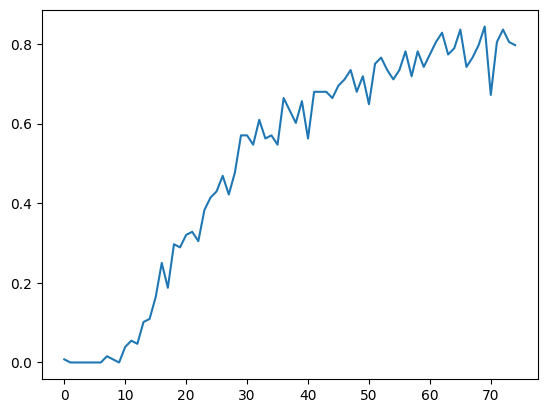

In [97]:
plt.plot(model_history.history['recall'])

In [98]:
model.evaluate(X_test2, y_test)

25/25 [==============================] - 0s 3ms/step - loss: 0.5685 - recall: 0.0476


[0.5684589743614197, 0.0476190485060215]

https://imbalanced-learn.org/stable/miscellaneous.html

https://www.freecodecamp.org/news/binary-classification-made-simple-with-tensorflow/


In [99]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]